# Lecture 8 : Calling C From Python

## Python imports and parameter settings

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gzip
plt.rcParams['figure.figsize'] = [8,6]

## Clone the materials repo to access datafiles.

In [2]:
!git clone https://code.vt.edu/jasonwil/cmda3634_materials.git

Cloning into 'cmda3634_materials'...
remote: Enumerating objects: 179, done.
remote: Counting objects: 100% (142/142), done.
remote: Compressing objects: 100% (135/135), done.
remote: Total 179 (delta 47), reused 9 (delta 2), pack-reused 37 (from 1)
Receiving objects: 100% (179/179), 29.05 MiB | 11.35 MiB/s, done.
Resolving deltas: 100% (52/52), done.


## Copy the lecture 8 files into our workspace.

In [3]:
!cp cmda3634_materials/L08/* .

# Part 1 : Working with Grayscale Images in Python

* Grayscale images are stored using a matrix where each entry in the matrix corresponds to the grayscale intensity of the pixel.

* The grayscale intensity values range between 0 (black) and 255 (white).  

* Since there are 256 possible values an intensity is typically stored using 8 bits (1 byte).

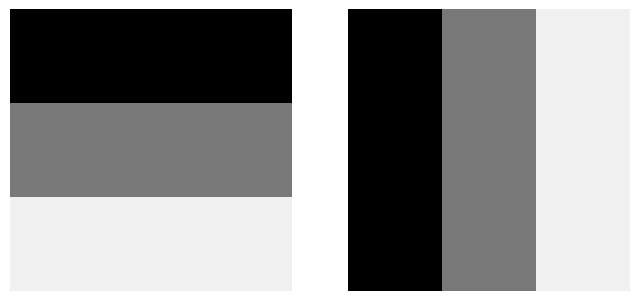

In [4]:
A = np.array([[0,0,0],[120,120,120],[240,240,240]])
f, axarr = plt.subplots(1,2)
axarr[0].imshow(A,cmap='gray',vmin=0, vmax=255)
axarr[1].imshow(A.T,cmap='gray',vmin=0, vmax=255)
axarr[0].axis('off')
axarr[1].axis('off');

## Concept : We can flatten a $m \times n$ matrix into a vector in $\mathbb{R}^{mn}$.  

## For example the matrix
$$A = \begin{bmatrix} 1 & 2 & 3 \\ 6 & 5 & 4 \end{bmatrix}$$

## can be flattened into the row vector in row-major order:
$$\mathbf{x}^T = \begin{bmatrix} 1 & 2 & 3 & 6 & 5 & 4 \end{bmatrix}$$

## This technique allows us to store a set of image matrices as row vectors in a single matrix.

printing all 9 images as rows in a single 9 x 9 matrix

[[  0  15  30  45  60  75  90 105 120]
 [ 15  30  45  60  75  90 105 120 135]
 [ 30  45  60  75  90 105 120 135 150]
 [ 45  60  75  90 105 120 135 150 165]
 [ 60  75  90 105 120 135 150 165 180]
 [ 75  90 105 120 135 150 165 180 195]
 [ 90 105 120 135 150 165 180 195 210]
 [105 120 135 150 165 180 195 210 225]
 [120 135 150 165 180 195 210 225 240]]
printing the third image as a 3 x 3 matrix
 [[ 30  45  60]
 [ 75  90 105]
 [120 135 150]]
showing all 9 images



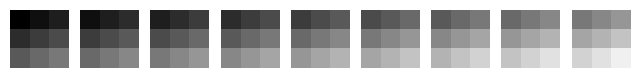

In [5]:
# Use a 9 x 9 matrix C to store 9 images where each image is 3 x 3
C = np.zeros((9,9),dtype=np.uint8)
for i in range(9):
    for j in range(9):
        C[i][j] = 15*i+15*j
print ('printing all 9 images as rows in a single 9 x 9 matrix\n')
print (C)
# Print the third image as a 3 x 3 matrix
image = C[2].reshape(3,3)
print ('printing the third image as a 3 x 3 matrix\n',image)
# Show all 9 images
print ('showing all 9 images\n')
f, axarr = plt.subplots(1,9)
for i in range(9):
    image = C[i].reshape(3,3)
    axarr[i].imshow(image,cmap='gray',vmin=0,vmax=255)
    axarr[i].axis('off')

# Part 2 : The MNIST Dataset

## The MNIST Training Set

### The MNIST training set has 60000 separate images and class labels.

In [6]:
# Opens MNIST training image set and stores it as a 60000 x 784 matrix
# There are 60000 images, each of which is 28 x 28 pixels
# Each image is stored as a 28x28 = 784 dimensional row vector in the matrix
f = gzip.open('train-images-idx3-ubyte.gz','r')
f.read(16) # skip file header
buf = f.read(60000*28*28)
data = np.frombuffer(buf,dtype=np.uint8)
train = data.reshape(60000,28*28)
print(train.shape)

(60000, 784)


In [7]:
# Opening and saving the 60000 training labels
f = gzip.open('train-labels-idx1-ubyte.gz','r')
f.read(8) #skip header
buf = f.read(60000)
train_labels = np.frombuffer(buf,dtype=np.uint8)
print (train_labels.shape)

(60000,)


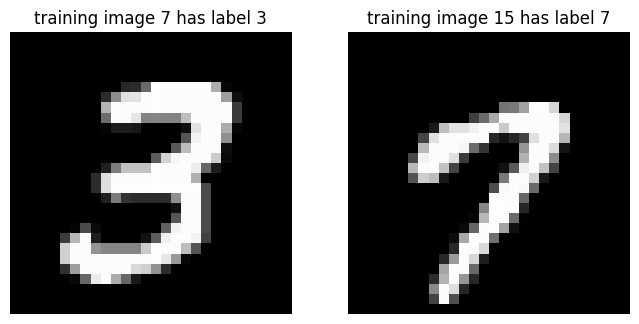

In [8]:
# plot 2 training images with labels
train_1 = 7
train_2 = 15
f, axarr = plt.subplots(1,2)
image1 = train[train_1].reshape(28,28)
image2 = train[train_2].reshape(28,28)
axarr[0].imshow(image1,cmap='gray',vmin=0, vmax=255)
axarr[1].imshow(image2,cmap='gray',vmin=0, vmax=255)
axarr[0].set_title('training image '+str(train_1)+' has label '+str(train_labels[train_1]))
axarr[1].set_title('training image '+str(train_2)+' has label '+str(train_labels[train_2]))
axarr[0].axis('off')
axarr[1].axis('off');

## The MNIST Test Set

### To test how well our classifier *generalizes* we need to run it on *test data*.
### It is critical that our *test data* is *separate* from our *training data*.
### Fortunately there is a MNIST test set with 10000 separate images and class labels.

In [9]:
# Opens MNIST test image set and stores it as a 10000 x 784 matrix
# There are 10000 images, each of which is 28 x 28 pixels
# Each image is stored as a 28x28 = 784 dimensional row vector in the matrix
f = gzip.open('t10k-images-idx3-ubyte.gz','r')
f.read(16) # skip header
buf = f.read(10000*28*28)
data = np.frombuffer(buf,dtype=np.uint8)
test = data.reshape(10000,28*28)
print(test.shape)

(10000, 784)


In [10]:
#Opening and saving the 10000 test labels
f = gzip.open('t10k-labels-idx1-ubyte.gz','r')
f.read(8) #skip header
buf = f.read(10000)
test_labels = np.frombuffer(buf,dtype=np.uint8)
print (test_labels.shape)

(10000,)


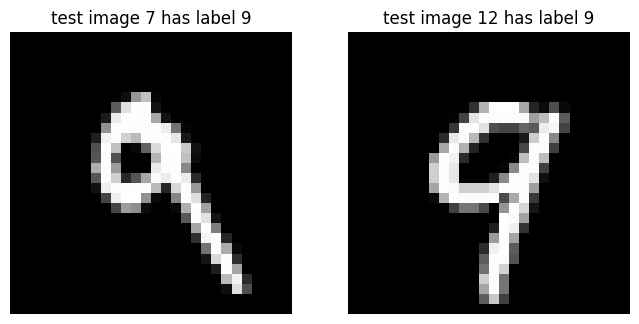

In [11]:
# plot 2 test images with labels
test_1 = 7
test_2 = 12
f, axarr = plt.subplots(1,2)
image1 = test[test_1].reshape(28,28)
image2 = test[test_2].reshape(28,28)
axarr[0].imshow(image1,cmap='gray',vmin=0, vmax=255)
axarr[1].imshow(image2,cmap='gray',vmin=0, vmax=255)
axarr[0].set_title('test image '+str(test_1)+' has label '+str(test_labels[test_1]))
axarr[1].set_title('test image '+str(test_2)+' has label '+str(test_labels[test_2]))
axarr[0].axis('off')
axarr[1].axis('off');

# Part 3 : Nearest Neighbor Classification

In [12]:
# find the index of the training image closest to the test image with the given index
# note that we interpret the image data as 32 bit integers to avoid overflow
def nearest_train_index(train,test,test_index):
    min_dist_sq = np.inf
    for i in range(len(train)):
        diff = train[i].astype(np.int32)-test[test_index].astype(np.int32)
        dist_sq = np.dot(diff,diff)
        if (dist_sq < min_dist_sq):
            min_dist_sq = dist_sq
            nearest_train_index = i
    return nearest_train_index

CPU times: user 647 ms, sys: 2.83 ms, total: 650 ms
Wall time: 1.02 s


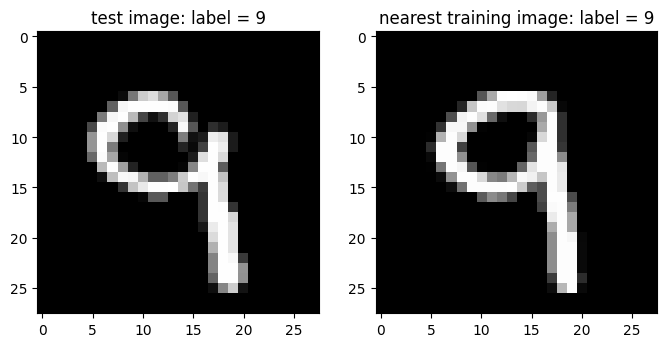

In [13]:
%%time
test_index = 2342
train_index = nearest_train_index(train,test,test_index)
f, axarr = plt.subplots(1,2)
image1 = test[test_index].reshape(28,28)
image2 = train[train_index].reshape(28,28)
axarr[0].imshow(image1,cmap='gray',vmin=0, vmax=255)
axarr[1].imshow(image2,cmap='gray',vmin=0, vmax=255)
axarr[0].title.set_text('test image: label = '+str(test_labels[test_index]))
axarr[1].title.set_text('nearest training image: label = '+str(train_labels[train_index]))

## **To classify a test image using nearest neighbor classification, we choose the class of the nearest training image.**

In [14]:
%%time
# to find images that are classified incorrectly use range(1100,1120)
classify_errors = 0
test_start = 1100
num_test = 20
for test_index in range(test_start,test_start+num_test):
    train_index = nearest_train_index(train,test,test_index)
    if (test_labels[test_index] != train_labels[train_index]):
        classify_errors += 1
        print ('*',end="")
    print (test_index,train_index,test_labels[test_index],train_labels[train_index])
print ('number of digits classified incorrectly =',classify_errors)
print ('classificiation rate =',(num_test-classify_errors)/num_test)

1100 28011 7 7
1101 56286 8 8
1102 13591 5 5
1103 4811 9 9
1104 53783 7 7
1105 5669 9 9
1106 1504 6 6
*1107 26432 9 5
1108 5218 6 6
1109 25107 3 3
1110 48878 7 7
1111 48754 4 4
*1112 53009 4 6
1113 43459 5 5
*1114 50745 3 8
1115 47854 5 5
1116 590 4 4
1117 52791 7 7
1118 39608 8 8
1119 33057 7 7
number of digits classified incorrectly = 3
classificiation rate = 0.85
CPU times: user 7.13 s, sys: 7.21 ms, total: 7.13 s
Wall time: 7.63 s


## Let's visualize a test image that the nearest neighbor classifier missed on.

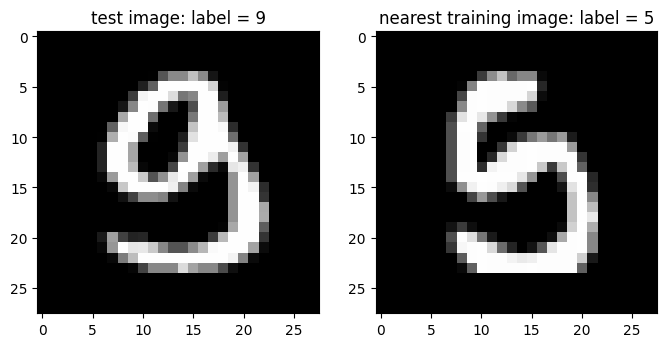

In [15]:
test_index = 1107
train_index = nearest_train_index(train,test,test_index)
f, axarr = plt.subplots(1,2)
image1 = test[test_index].reshape(28,28)
image2 = train[train_index].reshape(28,28)
axarr[0].imshow(image1,cmap='gray',vmin=0, vmax=255)
axarr[1].imshow(image2,cmap='gray',vmin=0, vmax=255)
axarr[0].title.set_text('test image: label = '+str(test_labels[test_index]))
axarr[1].title.set_text('nearest training image: label = '+str(train_labels[train_index]))

## We notice that doing digit classification using nearest neighbor search in Python is pretty **slow**.  

## In this lecture we will learn how to call C functions from Python to **speed up our handwritten digit classifier**!

# Part 4 : Calling C Functions From Python

## Recall that **train** is a 2d numpy array with 60000 rows that stores the MNIST training set.  

## Each row is a 28x28 image matrix that has been flattened into a 784 dimensional row vector of **bytes**.

In [16]:
print (train.shape)
print (train.flags)
print (train.dtype)

(60000, 784)
  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : False
  ALIGNED : True
  WRITEBACKIFCOPY : False

uint8


## C_CONTIGUOUS = True means that the elements of the 2d array are stored as a 1d array in **row-major order**.

## We will learn how to process C_CONTIGUOUS numpy arrays in when calling C code from Python.

## **This will enable us to get the number crunching performance advantages of using C while retaining the simplicity of Python for tasks such as file I/O, visualization, etc.**

## Let's look at a simple example before diving into how to speed up our digit classifier using C.

## Note that when using C and Python together it is crucial that you carefully specify the type of your Python array elements so that it is clear how many bytes each element requires.  

## In this example, we specify that the elements of A are of type int32 which is a 4 byte integer (the same number of bytes as a C int).  

In [17]:
%%writefile print2d.py
import numpy as np
# create 2d array
A = np.array([[ 1, 2, 3, 4 ], [ 5, 6, 7, 8 ], [ 9, 10, 11, 12 ]],dtype='int32')
# print 2d array
print (A)

Writing print2d.py


In [18]:
!python3 print2d.py

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


## Next we will write a C function that prints a 2d array of integers that has been flattened into a 1d array using **row-major order**.

In [19]:
%%writefile print2d.c
#include <stdio.h>
void print2d (int* A, int rows, int cols) {
    printf ("printing 2d array from C!\n");
    for (int i=0;i<rows;i++) {
        printf ("[ ");
        for (int j=0;j<cols;j++) {
            printf ("%d ",A[i*cols+j]);

        }
        printf ("]\n");
    }
}

Writing print2d.c


## In order to call our C function from Python we will need to create a **shared object library**.  This can be done using the following compiler command.

## Note: PIC stands for *position independent code*.

In [20]:
!gcc -fPIC -shared -o print2d.so print2d.c

## Here is a Python script that calls our C function to print the 2d array.

In [21]:
%%writefile print2d_c.py
import numpy as np
import ctypes as ct # for calling C from Python
lib = ct.cdll.LoadLibrary("./print2d.so") # load C print2d function

# create 2d array
A = np.array([[ 1, 2, 3, 4 ], [ 5, 6, 7, 8 ], [ 9, 10, 11, 12 ]],dtype='int32')
(rows,cols) = A.shape

# print 2d array using C function
A_cptr = A.ctypes.data_as(ct.POINTER(ct.c_int32))
lib.print2d(A_cptr,ct.c_int(rows),ct.c_int(cols))

Writing print2d_c.py


In [22]:
!python3 print2d_c.py

printing 2d array from C!
[ 1 2 3 4 ]
[ 5 6 7 8 ]
[ 9 10 11 12 ]


## For our next example we will write code to calculate a matrix vector product.

## This example illustrates that we can not only read Numpy arrays in C but we can also **modify them**!

## We start with a pure Python version.

In [23]:
%%writefile matvec.py
import numpy as np

# create 2d array of doubles
A = np.array([[0.2,1,2],[1,2.5,3],[4,5.8,6],[7,8,9.3]],dtype='float64')
(rows,cols) = A.shape
x = np.array([1,1,1],dtype='float64')
b = np.empty(4,dtype='float64');

# matvec multiply
for i in range(rows):
    b[i] = 0
    for j in range(cols):
        b[i] += A[i][j]*x[j]

# print result
print (b)

Writing matvec.py


In [24]:
!python3 matvec.py

[ 3.2  6.5 15.8 24.3]


## Next we write a C function to perform the matvec multiply.

## Note that our C function assumes that A is a 2d array of doubles that has been flattened into a 1d array using **row-major order**.

## It also assumes that *x* is a 1d array of *cols* doubles and *b* is a 1d array of *rows* doubles.

## **Note that *A* and *x* are the inputs to this function and *b* is the output.**

In [25]:
%%writefile matvec.c
void matvec(double* A, int rows, int cols, double* x, double* b) {
    for (int i=0;i<rows;i++) {
        b[i] = 0;
        for (int j=0;j<cols;j++) {
            b[i] += A[i*cols+j]*x[j];
        }
    }
}

Writing matvec.c


## Create a shared object library for our C code.

In [26]:
!gcc -fPIC -shared -o matvec.so matvec.c

## Finally, let's modify the Python script to call our C function.

In [27]:
%%writefile matvec_c.py
import numpy as np
import ctypes as ct # for calling C from Python
lib = ct.cdll.LoadLibrary("./matvec.so") # load C matvec function

# create 2d array of doubles
A = np.array([[0.2,1,2],[1,2.5,3],[4,5.8,6],[7,8,9.3]],dtype='float64')
(rows,cols) = A.shape
x = np.array([1,1,1],dtype='float64')
b = np.empty(4,dtype='float64');

# call C to do the matvec multiply
A_cptr = A.ctypes.data_as(ct.POINTER(ct.c_double))
x_cptr = x.ctypes.data_as(ct.POINTER(ct.c_double))
b_cptr = b.ctypes.data_as(ct.POINTER(ct.c_double))
lib.matvec(A_cptr,ct.c_int(rows),ct.c_int(cols),x_cptr,b_cptr)

# print result
print (b)

Writing matvec_c.py


In [28]:
!python3 matvec_c.py

[ 3.2  6.5 15.8 24.3]


# Part 5 : Calling C from Python to Accelerate Digit Classification

## Here is a Python script that performs nearest neighbor classification on the MNIST data.

## It takes a single command line argument which specifies how many MNIST images to test.

## Note that we separately time the **number crunching** part of the code where most of the time is being spent.  


In [29]:
%%writefile nearest.py
import sys
import numpy as np
import gzip
import time # to time part of the code

# make sure a command line argument for the number of test images is provided
if (len(sys.argv) < 2):
    print ('command usage :',sys.argv[0],'num_test')
    exit(1)
num_test = int(sys.argv[1])
print ('number of digits to classify =',num_test)

# Opens MNIST training image set and stores it as a 60000 x 784 matrix
# There are 60000 images, each of which is 28 x 28 pixels
# Each image is stored as a 28x28 = 784 dimensional row vector in the matrix
f = gzip.open('train-images-idx3-ubyte.gz','r')
f.read(16) # skip file header
buf = f.read(60000*28*28)
data = np.frombuffer(buf,dtype=np.uint8)
train = data.reshape(60000,28*28)

# Opening and saving the 60000 training labels
f = gzip.open('train-labels-idx1-ubyte.gz','r')
f.read(8) #skip header
buf = f.read(60000)
train_labels = np.frombuffer(buf,dtype=np.uint8)

# Opens MNIST test image set and stores it as a 10000 x 784 matrix
# There are 10000 images, each of which is 28 x 28 pixels
# Each image is stored as a 28x28 = 784 dimensional row vector in the matrix
f = gzip.open('t10k-images-idx3-ubyte.gz','r')
f.read(16) # skip header
buf = f.read(10000*28*28)
data = np.frombuffer(buf, dtype=np.uint8)
test = data.reshape(10000,28*28)

# Opening and saving the 10000 test labels
f = gzip.open('t10k-labels-idx1-ubyte.gz','r')
f.read(8) #skip header
buf = f.read(10000)
test_labels = np.frombuffer(buf,dtype=np.uint8)

# Allocate space to store the nearest neighbor indices
nearest = np.empty(num_test,dtype='int32')

# time just the nearest neighbor code
start = time.process_time()

# find the index of the training image closest to the test image with the given index
# note that we interpret the image data as 32 bit integers to avoid overflow
for test_index in range(num_test):
    min_dist_sq = np.inf
    for train_index in range(len(train)):
        diff = train[train_index].astype(np.int32)-test[test_index].astype(np.int32)
        dist_sq = np.dot(diff,diff)
        if (dist_sq < min_dist_sq):
            min_dist_sq = dist_sq
            nearest[test_index] = train_index

# record and print elapsed time
elapsed = time.process_time()-start
print ('Time to find nearest neighbors in Python =',np.round(elapsed,4),'seconds')

# count nearest neighbor classification errors
labels_diff = test_labels[:num_test] - train_labels[nearest]
classify_errors = np.count_nonzero(labels_diff)
print ('number of classification errors =',classify_errors)
print ('classificiation rate =',(num_test-classify_errors)/num_test)

Writing nearest.py


In [30]:
!time python3 nearest.py 200

number of digits to classify = 200
Time to find nearest neighbors in Python = 80.4322 seconds
number of classification errors = 2
classificiation rate = 0.99

real	1m21.647s
user	1m20.876s
sys	0m0.162s


## To estimate how long would it take to classify all 10000 test images in Python we assume that the time it takes to classify is proportional to the number of test images.  

## Since it took around 80 seconds to classify 200 test images it would take over 1 hour (i.e. 80*(10000/200) = 4000 seconds) to classify 10000 test images in Python!

## The Python script is spending most of the time in lines 52-59 finding the nearest neighbors.  

## **The pure number crunching code in lines 52-59 is precisely the type of thing C is good for!**

## Here is some C code that just finds the nearest neighbors.

## For efficiency we include a version of **vec_dist_sq** that operates on input of type **byte** and stores the result in an **int** to avoid overflow.

## The inputs are the training dataset and the test dataset.  The output is an array of nearest neighbor indices.  This output array gives the index of the training image that is closest every test image.

## Note that *train* and *test* are pointers to the training and test datasets that are 2d arrays flattened into 1d arrays stored in **row-major order**.  

In [31]:
%%writefile nearest.c
#include <stdio.h>
#include <stdlib.h>
#include <limits.h>

typedef unsigned char byte;

// calculates ||u-v||^2
// we accumulate the result using a C int to avoid overflow
int vec_dist_sq (byte* u, byte* v, int dim) {
    int dist_sq = 0;
    for (int i=0;i<dim;i++) {
        dist_sq += (u[i]-v[i])*(u[i]-v[i]);
    }
    return dist_sq;
}

// for each test vector find the nearest training vector
void nearest(byte* train, int num_train, byte* test, int num_test, int* nearest, int dim) {
    for (int i=0;i<num_test;i++) {
        int min_dist_sq = INT_MAX;
        for (int j=0;j<num_train;j++) {
            int dist_sq = vec_dist_sq(test+i*dim,train+j*dim,dim);
            if (dist_sq < min_dist_sq) {
                min_dist_sq = dist_sq;
                nearest[i] = j;
            }
        }
    }
}

Writing nearest.c


## Create a shared object library for our C code.

## Note that we use the optimization flags -O3 and -march=native

In [32]:
!gcc -O3 -march=native -fPIC -shared -o nearest.so nearest.c

## Finally, let's modify the Python script to call our C function.

In [33]:
%%writefile nearest_c.py
import sys
import numpy as np
import gzip
import ctypes as ct # for calling C from Python
lib = ct.cdll.LoadLibrary("./nearest.so") # load C nearest function
import time # to time part of the code

# make sure a command line argument for the number of test images is provided
if (len(sys.argv) < 2):
    print ('command usage :',sys.argv[0],'num_test')
    exit(1)
num_test = int(sys.argv[1])
print ('number of digits classified =',num_test)

# Opens MNIST training image set and stores it as a 60000 x 784 matrix
# There are 60000 images, each of which is 28 x 28 pixels
# Each image is stored as a 28x28 = 784 dimensional row vector in the matrix
f = gzip.open('train-images-idx3-ubyte.gz','r')
f.read(16) # skip file header
buf = f.read(60000*28*28)
data = np.frombuffer(buf,dtype=np.uint8)
train = data.reshape(60000,28*28)

# Opening and saving the 60000 training labels
f = gzip.open('train-labels-idx1-ubyte.gz','r')
f.read(8) #skip header
buf = f.read(60000)
train_labels = np.frombuffer(buf,dtype=np.uint8)

# Opens MNIST test image set and stores it as a 10000 x 784 matrix
# There are 10000 images, each of which is 28 x 28 pixels
# Each image is stored as a 28x28 = 784 dimensional row vector in the matrix
f = gzip.open('t10k-images-idx3-ubyte.gz','r')
f.read(16) # skip header
buf = f.read(10000*28*28)
data = np.frombuffer(buf, dtype=np.uint8)
test = data.reshape(10000,28*28)

# Opening and saving the 10000 test labels
f = gzip.open('t10k-labels-idx1-ubyte.gz','r')
f.read(8) #skip header
buf = f.read(10000)
test_labels = np.frombuffer(buf,dtype=np.uint8)

# Allocate space to store the nearest neighbor indices
nearest = np.empty(num_test,dtype='int32')

# time just the nearest neighbor code
start = time.process_time()

# find the nearest neighbors using C
train_cptr = train.ctypes.data_as(ct.POINTER(ct.c_uint8))
test_cptr = test.ctypes.data_as(ct.POINTER(ct.c_uint8))
nearest_cptr = nearest.ctypes.data_as(ct.POINTER(ct.c_int32))
lib.nearest(train_cptr,ct.c_int(len(train)),test_cptr,ct.c_int(num_test),
        nearest_cptr,ct.c_int(len(train[0])))

# record and print elapsed time
elapsed = time.process_time()-start
print ('Time to find nearest neighbors in C =',np.round(elapsed,4),'seconds')

# count nearest neighbor classification errors
labels_diff = test_labels[:num_test] - train_labels[nearest]
classify_errors = np.count_nonzero(labels_diff)
print ('number of classification errors =',classify_errors)
print ('classificiation rate =',(num_test-classify_errors)/num_test)

Writing nearest_c.py


# We can now classify the entire test set in just over one minute using Python/C.

In [34]:
!time python3 nearest_c.py 10000

number of digits classified = 10000
Time to find nearest neighbors in C = 64.088 seconds
number of classification errors = 309
classificiation rate = 0.9691

real	1m5.824s
user	1m4.574s
sys	0m0.133s


# Part 6 : Image Edge Detection in Python

In [35]:
import numpy as np # for matrix processing
from PIL import Image, ImageOps # for image processing

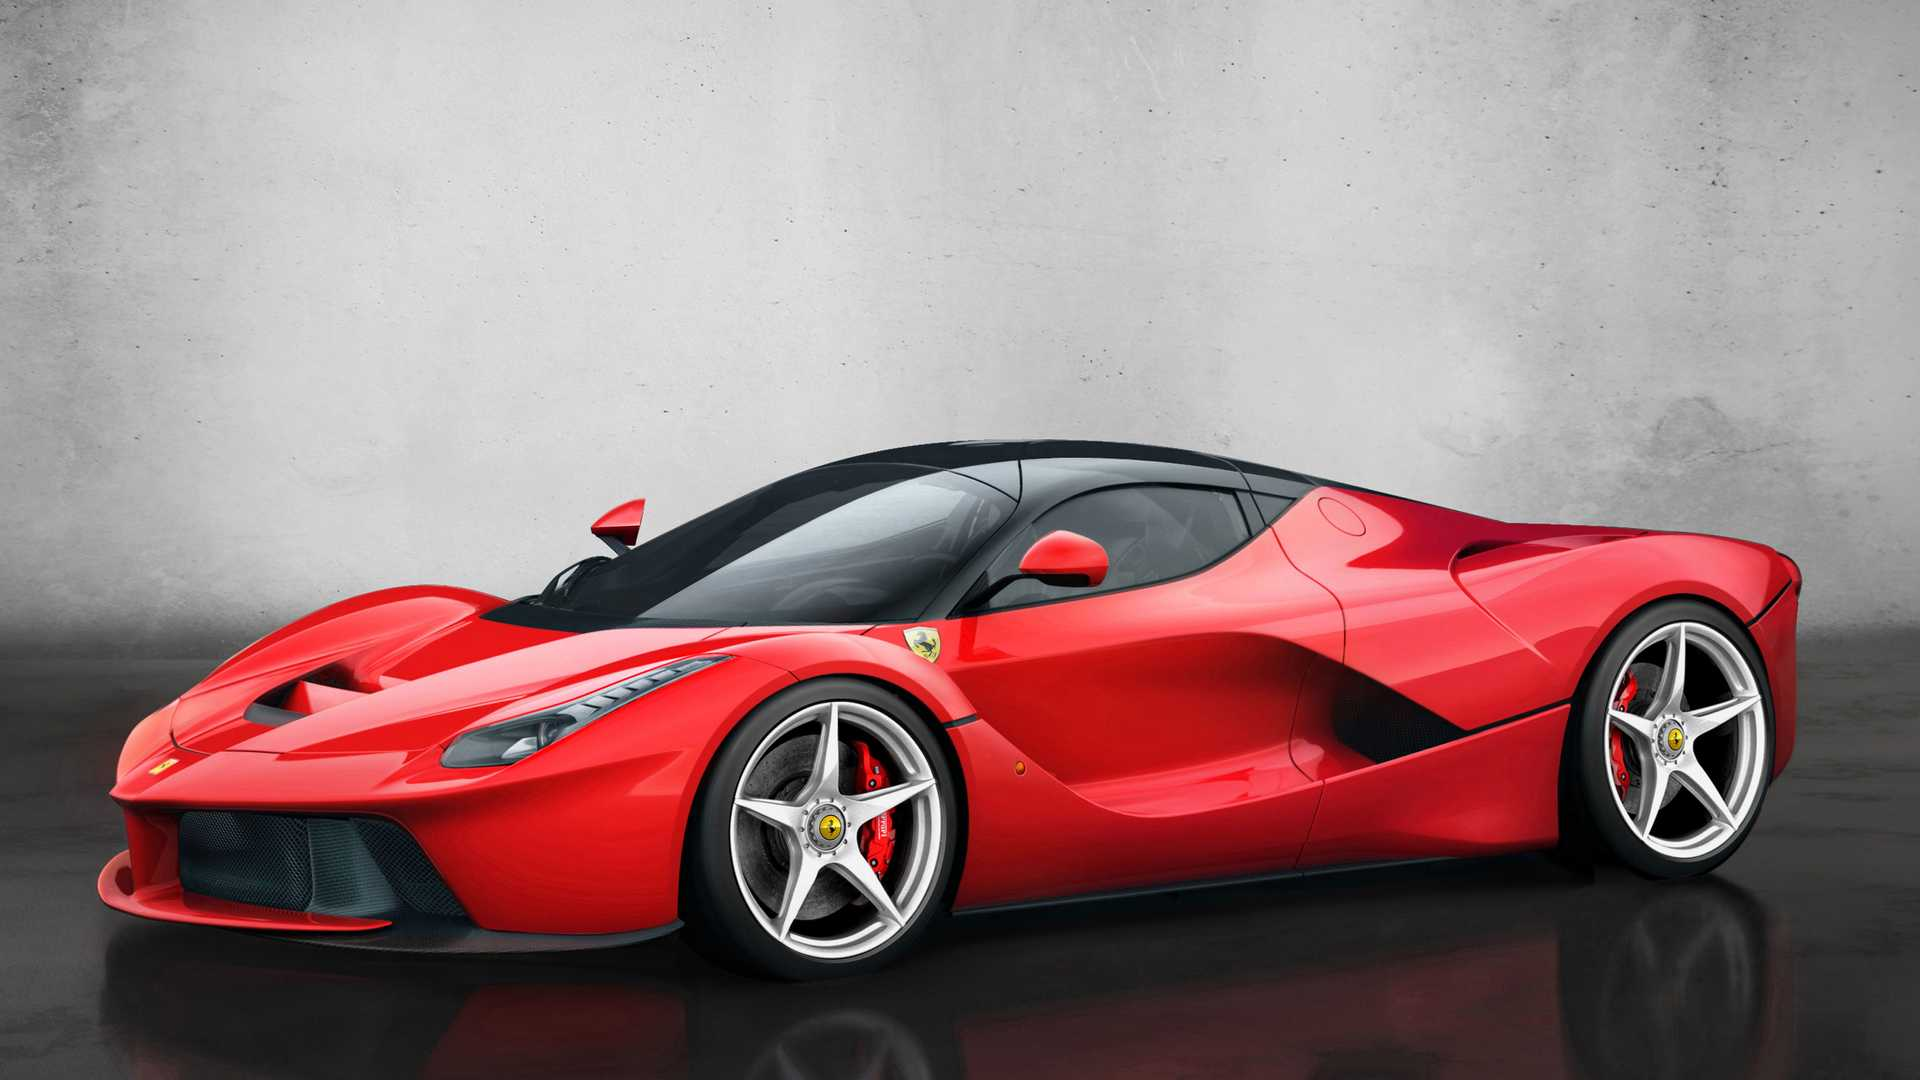

In [36]:
car = Image.open("car.jpg")
car

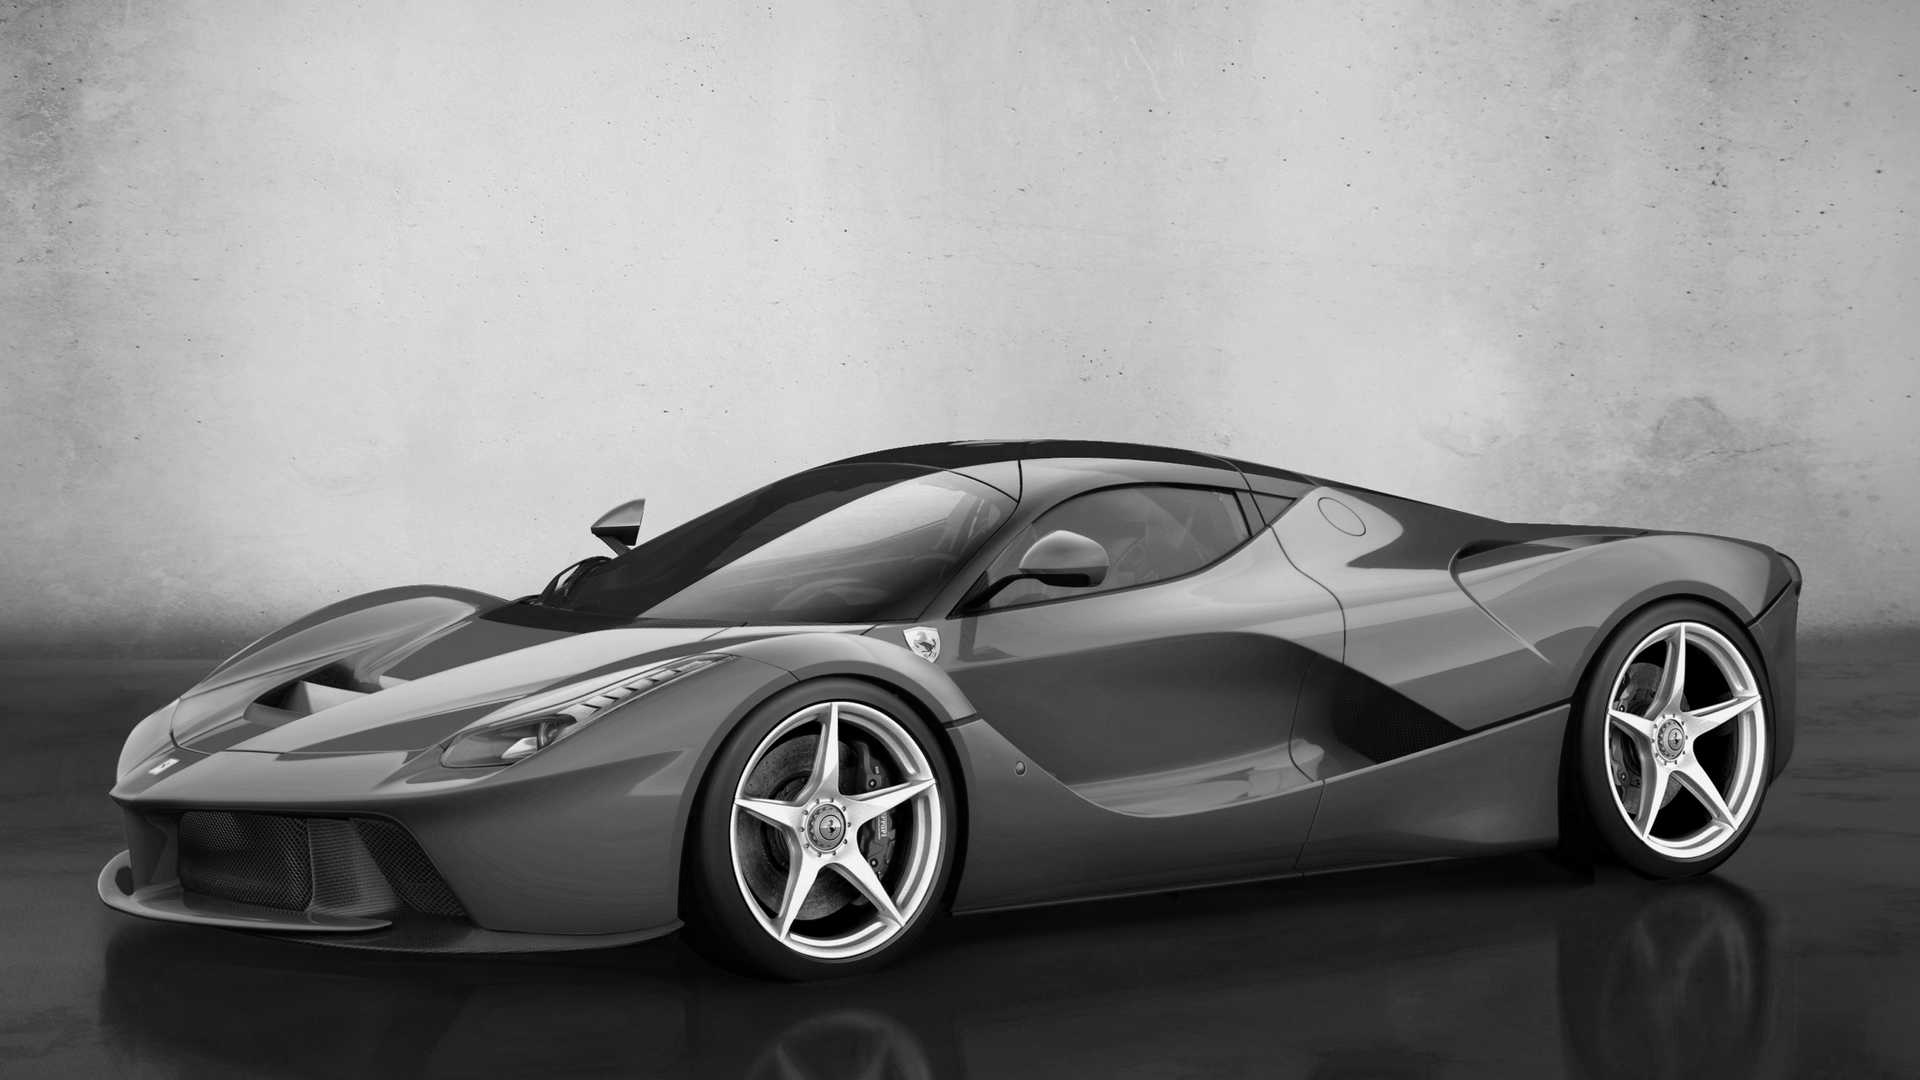

In [37]:
grayCar = ImageOps.grayscale(car)
grayCar

In [38]:
width,height = grayCar.size
print('grayscale car image is ',height,' pixels tall and ',width,' pixels wide.')

grayscale car image is  1080  pixels tall and  1920  pixels wide.


In [39]:
carA = np.array(grayCar)
print (carA)

[[132 135 140 ... 154 154 154]
 [125 132 139 ... 154 154 154]
 [125 131 136 ... 155 155 155]
 ...
 [ 64  64  64 ...  42  41  41]
 [ 65  64  64 ...  41  40  40]
 [ 65  64  64 ...  40  39  39]]


In [40]:
rows,cols = carA.shape
print ('A has ',rows,'rows and ',cols,' columns.')

A has  1080 rows and  1920  columns.


## Sobel Edge Detector

Sobel edge detection consists of the following two kernels that we apply to each pixel in the image to detect vertical and horizontal edges.

$$\begin{bmatrix} -1 & 0 & +1 \\ -2 & 0 & +2 \\ -1 & 0 & +1 \end{bmatrix} \qquad
\begin{bmatrix} +1 & +2 & +1 \\ 0 & 0 & 0 \\ -1 & -2 & -1 \end{bmatrix}$$

Example : Apply each kernel to the center pixel of the following image matrix.

$$\begin{bmatrix} 1 & 1 & 1 \\ 0 & 0 & 0 \\ 2 & 2 & 2 \end{bmatrix}$$

We apply the first kernel which detects vertical edges:

$$G_x = (-1)(1) + 0(1) + 1(1) + (-2)(0) + 0(0) + 2(0) + (-1)(2) + 0(2) + 1(2) = 0$$

We apply the second kernel which detects horizontal edges:

$$G_y = (1)(1) + 2(1) + 1(1) + 0(0) + 0(0) + 0(0) + (-1)(2) + (-2)(2) + (-1)(2) = -4$$

To combine the results of the detectors we use the formula
$$|G| = |G_x| + |G_y| = 0 + 4 = 4$$

Given a $3 \times 3$ piece of an image matrix
$$\begin{bmatrix} P_1 & P_2 & P_3 \\ P_4 & P_5 & P_6 \\ P_7 & P_8 & P_9 \end{bmatrix}$$

we can compute value of $|G|$ at the pixel $P_5$ using the formula
$$|G| = |P_3 + 2P_6 + P_9 - P_1 - 2P_4 - P_7| + |P_1+2P_2+P_3-P_7-2P_8-P_9|$$

We will pad the perimeter of the image matrix with zeros to ensure that the above formula can be computed at each pixel.

We can threshold the value of $|G|$ to determine whether to color the pixel black (when $|G| \leq$ threshold) or
white (when $|G| > $ threshold).   


## Padding 2d Arrays in Python

### In order to apply the kernel to the edges of image matrix we will need to pad the array.  We will pad with zeroes although there are other options.

### Let's look at a simple example:

In [41]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
A_pad = np.pad(A,[1,1],'constant',constant_values = 0)
print (A,'\n')
print (A_pad)

[[1 2 3]
 [4 5 6]
 [7 8 9]] 

[[0 0 0 0 0]
 [0 1 2 3 0]
 [0 4 5 6 0]
 [0 7 8 9 0]
 [0 0 0 0 0]]


## Let's time some Python code to run the Sobel Edge detector on our car image.  

CPU times: user 15.2 s, sys: 13.6 ms, total: 15.3 s
Wall time: 15.4 s


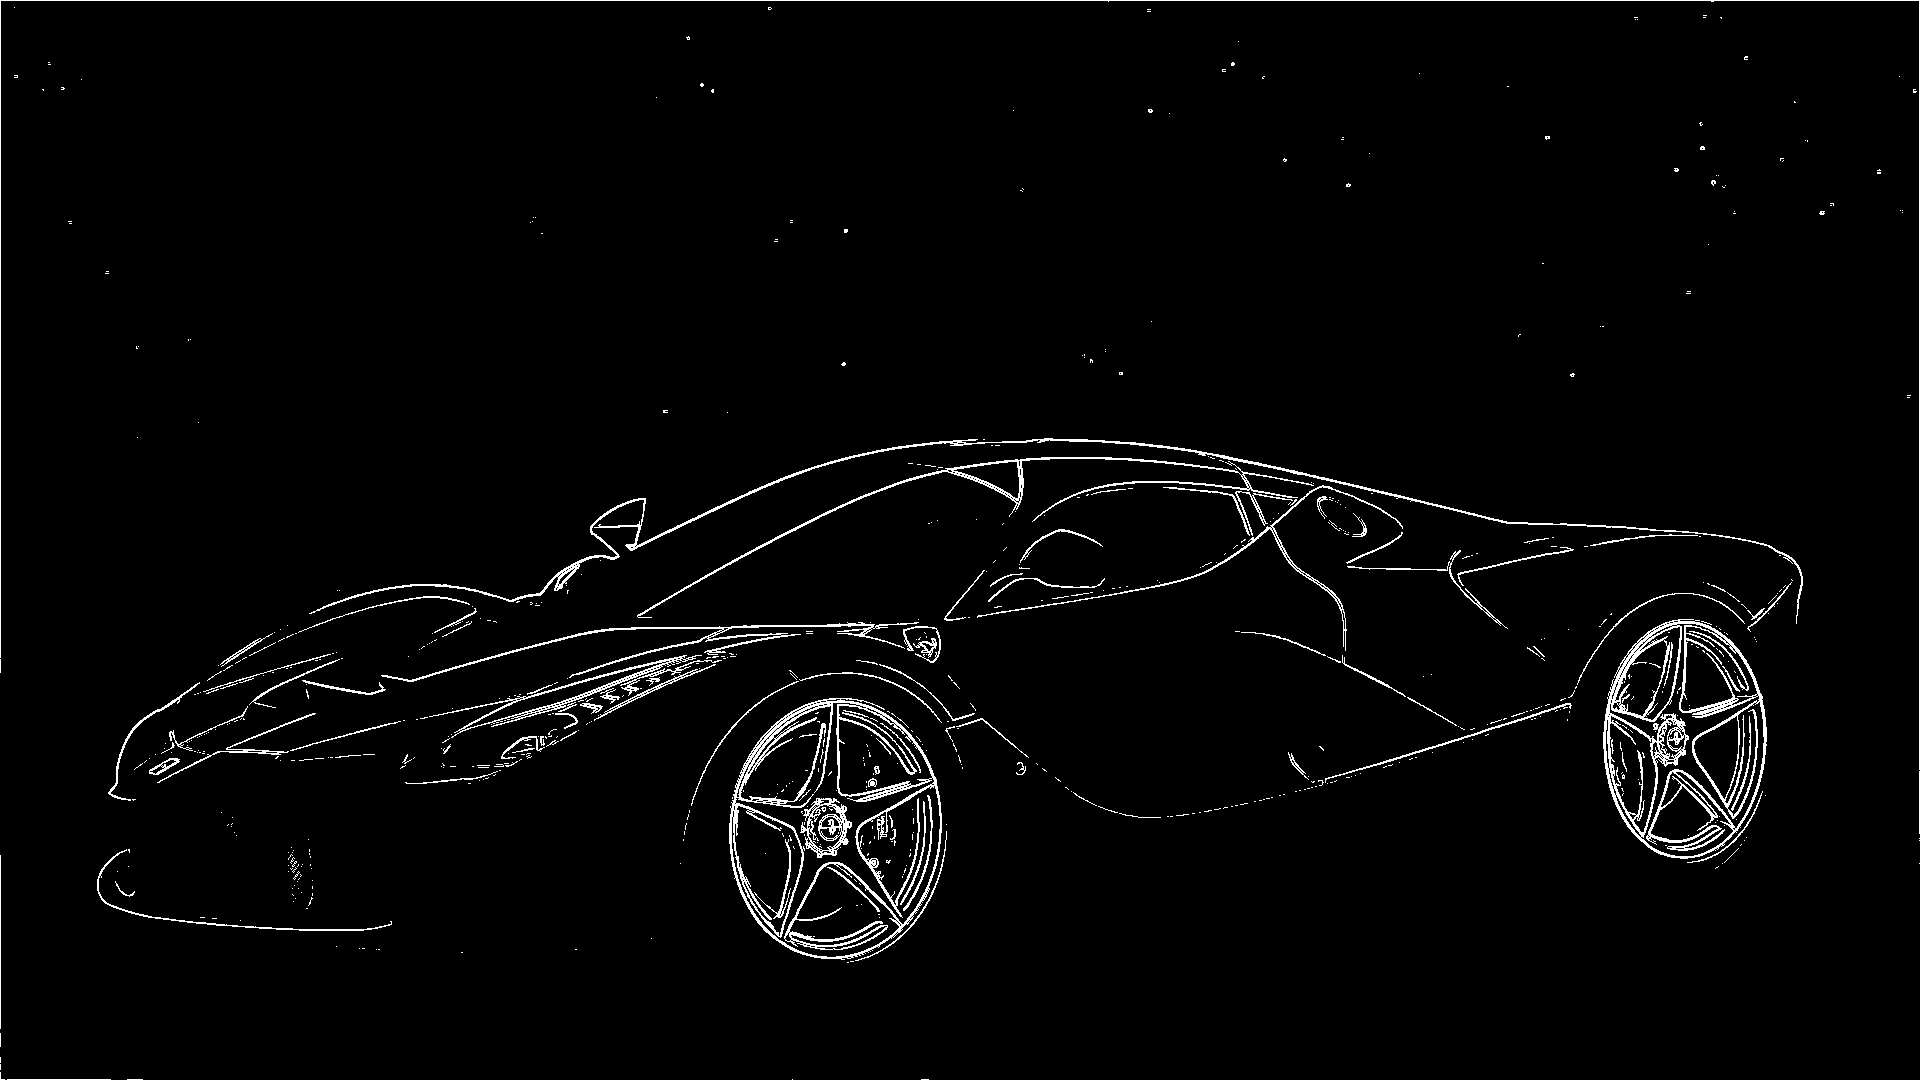

In [42]:
%%time
threshold = 250
carA_pad = np.pad(carA.astype(np.int32),[1,1],'constant',constant_values = 0)
E = np.zeros((rows,cols),dtype='uint8')
for i in range(1,rows+1):
    for j in range(1,cols+1):
        P1 = carA_pad[i-1][j-1]
        P2 = carA_pad[i-1][j]
        P3 = carA_pad[i-1][j+1]
        P4 = carA_pad[i][j-1]
        P6 = carA_pad[i][j+1]
        P7 = carA_pad[i+1][j-1]
        P8 = carA_pad[i+1][j]
        P9 = carA_pad[i+1][j+1]
        Gx = P3+2*P6+P9-P1-2*P4-P7
        Gy = P1+2*P2+P3-P7-2*P8-P9
        size = np.abs(Gx)+np.abs(Gy)
        if (size > threshold):
            E[i-1][j-1] = 255
edges = Image.fromarray(E)
edges

## Using Python to run the Sobel Edge detector on the car image takes over 15 seconds!

## In Worksheet 6 you will use C to accelerate the Python Sobel Edge Detector.